In [1]:
%matplotlib inline

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import pystan
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
from sklearn.model_selection import train_test_split
from sklearn.linear_model import BayesianRidge

In [14]:
u='https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports_us/'
c1 = "Date,Country_Region,Last_Update,Lat,Long_,Confirmed,"
c2 = "Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,"
c3 = "Testing_Rate,Hospitalization_Rate"
labels = c1+c2+c3
cols = labels.split(',')
print cols

['Date', 'Country_Region', 'Last_Update', 'Lat', 'Long_', 'Confirmed', 'Deaths', 'Recovered', 'Active', 'FIPS', 'Incident_Rate', 'People_Tested', 'People_Hospitalized', 'Mortality_Rate', 'UID', 'ISO3', 'Testing_Rate', 'Hospitalization_Rate']


In [5]:
df_all = pd.DataFrame(columns = cols)
start_date = datetime.date(2020, 4, 12)
end_date = datetime.date(2020, 7, 13)
delta = datetime.timedelta(days=1)
date = start_date
while(date <= end_date):
    date_df = pd.DataFrame(columns = [date])
    if(date.month/10 ==0):
        mo = '0' + str(date.month)
    else:
        mo = str(date.month)
    if(date.day /10 ==0):
        day = '0'+ str(date.day)
    else:
        day = str(date.day)
    url = u + mo +'-'+ day +'-' + str(date.year)+".csv"
    df = pd.read_csv(url, index_col =0)
    df_all = pd.concat([df_all, df])
    if(date == start_date):
        print len(df_all.index)
    date += delta

/mnt/c/Users/Sharanya Pulapura/Desktop/reu/env/venv/lib/python2.7/site-packages/ipykernel_launcher.py:18: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



59


NameError: name 'df_ny' is not defined

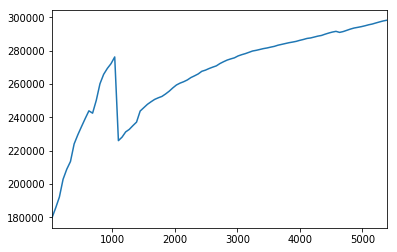

In [65]:
df_ny = df_all.loc[df_all['index']=="New York"]
conf = df_ny['Active']
conf.plot()

In [66]:
df_ny= df_ny.reset_index()


In [67]:
df_ny

,level_0,index,Active,Confirmed,Country_Region,Date,Deaths,FIPS,Hospitalization_Rate,ISO3,Incident_Rate,Last_Update,Lat,Long_,Mortality_Rate,People_Hospitalized,People_Tested,Recovered,Testing_Rate,UID
0,35,New York,179648,189033,US,NaN,9385,36.0,22.532574,USA,1121.124012,2020-04-12 23:18:15,42.1657,-74.9481,4.964742,42594.0,461601.0,23887.0,2737.680538,84000036
1,95,New York,185691,195749,US,NaN,10058,36.0,21.819779,USA,1160.955517,2020-04-13 23:07:54,42.1657,-74.9481,5.138213,42712.0,478357.0,23887.0,2837.057652,84000036
2,154,New York,192178,203020,US,NaN,10842,36.0,22.756871,USA,1204.078637,2020-04-14 23:33:31,42.1657,-74.9481,5.340361,46201.0,499143.0,23887.0,2960.336041,84000036
3,213,New York,202837,214454,US,NaN,11617,36.0,21.543548,USA,1271.891833,2020-04-15 22:56:51,42.1657,-74.9481,5.417013,46201.0,526012.0,23887.0,3119.691715,84000036
4,272,New York,208859,223691,US,NaN,14832,36.0,22.553433,USA,1326.674980,2020-04-16 23:30:51,42.1657,-74.9481,6.630575,50450.0,550579.0,23887.0,3265.394601,84000036
5,331,New York,213466,230597,US,NaN,17131,36.0,22.734034,USA,1367.633344,2020-04-17 23:30:52,42.1657,-74.9481,7.428978,52424.0,550579.0,23887.0,3265.394601,84000036
6,390,New York,224041,241712,US,NaN,17671,36.0,22.480886,USA,1433.554603,2020-04-18 22:32:47,42.1657,-74.9481,7.310767,54339.0,596532.0,23887.0,3537.934378,84000036
7,449,New York,229517,247815,US,NaN,18298,36.0,22.485725,USA,1469.750504,2020-04-19 23:41:01,42.1657,-74.9481,7.383734,55723.0,617555.0,23887.0,3662.618376,84000036
8,508,New York,234449,253060,US,NaN,18611,36.0,22.565004,USA,1500.857747,2020-04-20 23:36:47,42.1657,-74.9481,7.354382,57103.0,633861.0,23887.0,3759.326613,84000036
9,567,New York,239257,258361,US,NaN,19104,36.0,22.102020,USA,1532.297117,2020-04-21 23:40:34,42.1657,-74.9481,7.394305,57103.0,649325.0,23887.0,3851.041084,84000036


In [68]:
x_train, x_test, y_train, y_test = train_test_split(df_ny.index, df_ny["Active"], test_size = 0.25)
x_train = x_train.to_numpy()
x_test = x_test.to_numpy()
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

['normalize', 'n_iter', 'verbose', 'lambda_1', 'lambda_2', 'fit_intercept', 'alpha_2', 'tol', 'alpha_1', 'copy_X', 'compute_score']


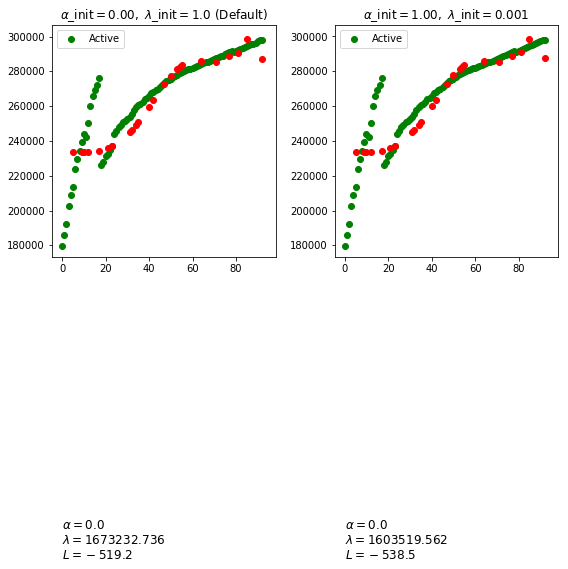

In [80]:

# #############################################################################
# Fit by cubic polynomial
n_order = 10
X_train = np.vander(x_train, n_order + 1, increasing=True)
X_test = np.vander(x_test, n_order + 1, increasing=True)

# #############################################################################
# Plot the true and predicted curves with log marginal likelihood (L)
reg = BayesianRidge(tol=1e-6, fit_intercept=True, compute_score=True)
fig, axes = plt.subplots(1, 2, figsize=(8, 4))
print(reg.get_params().keys())
for i, ax in enumerate(axes):
    # Bayesian ridge regression with different initial value pairs
    if i == 0:
        init = [1 / np.var(y_train), 1.]  # Default values
    elif i == 1:
        init = [1., 1e-3]
        reg.set_params(alpha_1=init[0], lambda_1=init[1])
    reg.fit(X_train, y_train)
    ymean, ystd = reg.predict(X_test, return_std=True)

    #ax.scatter(x_test, y_test, color="blue")
    #ax.scatter(x_train, y_train, color = "red", s=50, alpha=0.5)
    ax.scatter(df_ny.index, df_ny["Active"], color = "green")
    ax.scatter(x_test, ymean, color="red")
    #ax.fill_between(x_test, ymean-ystd, ymean+ystd,
                    #color="pink", alpha=0.5, label="predict std")
    #ax.set_ylim(-1.3, 1.3)
    ax.legend()
    title = "$\\alpha$_init$={:.2f},\\ \\lambda$_init$={}$".format(
            init[0], init[1])
    if i == 0:
        title += " (Default)"
    ax.set_title(title, fontsize=12)
    text = "$\\alpha={:.1f}$\n$\\lambda={:.3f}$\n$L={:.1f}$".format(
           reg.alpha_, reg.lambda_, reg.scores_[-1])
    ax.text(0.05, -1.0, text, fontsize=12)

plt.tight_layout()
plt.show()